In [1546]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import seaborn as sns
import plotly.express as px
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, r2_score


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [1547]:
df=pd.read_csv('Salary_dataset.csv')

In [1548]:
df=df.drop(columns='Unnamed: 0')

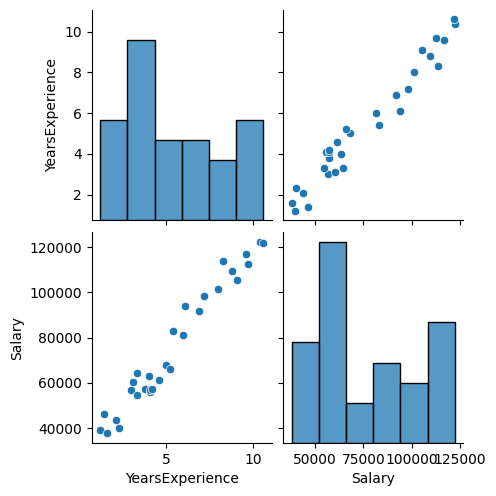

In [1549]:
sns.pairplot(df)

In [1550]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [1551]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [1552]:
X_train,X_test,Y_train,Y_test=train_test_split(df.iloc[:,:-1],df['Salary'],test_size=0.2,random_state=2)

In [1553]:
X_train

,YearsExperience
23,8.3
6,3.1
3,2.1
20,6.9
5,3.0
27,9.7
12,4.1
4,2.3
10,4.0
16,5.2


In [1554]:
X_test

,YearsExperience
1,1.4
0,1.2
14,4.6
9,3.8
21,7.2
19,6.1


In [1555]:
model=LinearRegression()
model.fit(X_train,Y_train)#minimizira eeror

LinearRegression()

In [1556]:
model.score(X_train,Y_train)

0.9654753572257188

In [1557]:
model.coef_

array([9569.58688543])

In [1558]:
model.intercept_

np.float64(23437.210463405063)

In [1559]:
y_pred=model.predict(X_test)

In [1560]:
print(r2_score(Y_test,y_pred))

0.8886956733784563


In [1561]:
df=pd.read_csv('avg-household-size.csv')

In [1562]:
df.sample(10)

,statefips,countyfips,avghouseholdsize,geography
1896,31,179,2.33,"Wayne County, Nebraska"
2463,46,49,2.16,"Faulk County, South Dakota"
2178,40,95,2.64,"Marshall County, Oklahoma"
1132,22,39,2.65,"Evangeline Parish, Louisiana"
1707,37,107,2.47,"Lenoir County, North Carolina"
1931,35,1,2.52,"Bernalillo County, New Mexico"
335,12,33,2.53,"Escambia County, Florida"
1845,31,77,2.46,"Greeley County, Nebraska"
1990,36,19,2.32,"Clinton County, New York"
555,19,9,2.15,"Audubon County, Iowa"


In [1563]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   statefips         3220 non-null   int64  
 1   countyfips        3220 non-null   int64  
 2   avghouseholdsize  3220 non-null   float64
 3   geography         3220 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 100.8+ KB


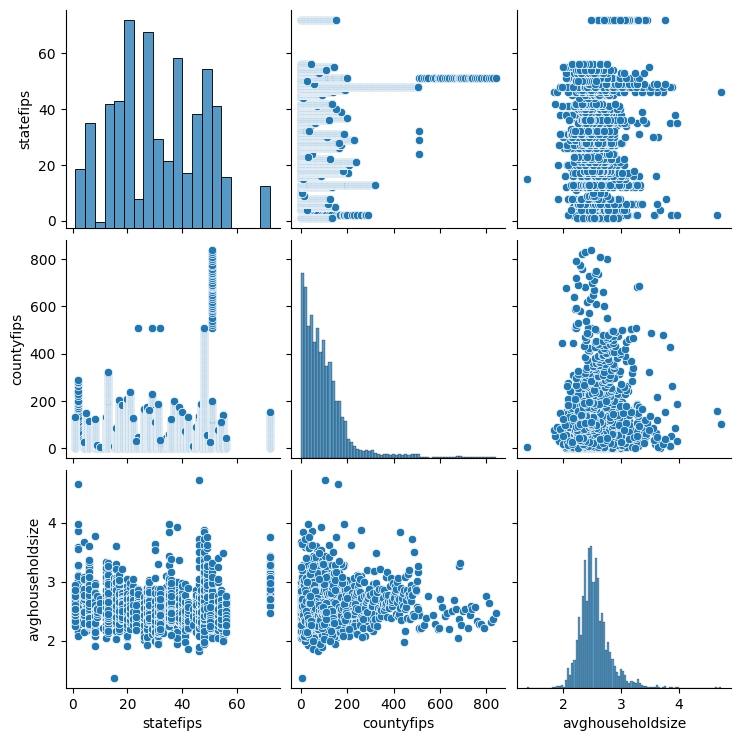

In [1564]:
sns.pairplot(df)

In [1565]:
df.geography.unique()

array(['Aleutians East Borough, Alaska',
       'Aleutians West Census Area, Alaska',
       'Anchorage Municipality, Alaska', ..., 'Uinta County, Wyoming',
       'Washakie County, Wyoming', 'Weston County, Wyoming'], dtype=object)

In [1566]:
df.avghouseholdsize.unique()

array([2.43, 3.59, 2.77, 3.86, 2.5 , 2.34, 3.56, 2.69, 2.12, 2.26, 2.62,
       2.57, 2.55, 2.98, 4.65, 2.9 , 3.03, 3.26, 3.28, 3.97, 2.4 , 2.49,
       2.15, 3.11, 3.1 , 2.08, 2.32, 2.81, 2.68, 2.6 , 2.61, 2.95, 2.74,
       2.73, 2.52, 2.44, 2.28, 2.37, 2.45, 2.48, 2.42, 2.56, 2.53, 2.65,
       2.36, 2.47, 2.7 , 2.27, 2.35, 2.46, 2.54, 2.64, 2.24, 2.72, 2.51,
       2.59, 2.66, 2.75, 2.86, 2.39, 2.23, 2.31, 2.58, 2.67, 2.33, 2.25,
       2.41, 2.16, 2.8 , 3.67, 3.02, 2.78, 2.14, 3.08, 2.87, 3.04, 2.3 ,
       3.06, 2.82, 3.17, 2.92, 3.61, 3.21, 3.19, 3.35, 2.29, 3.32, 2.38,
       3.24, 2.76, 3.33, 3.16, 2.85, 2.89, 2.63, 3.36, 2.19, 2.21, 2.13,
       3.78, 2.94, 2.18, 1.91, 2.2 , 2.22, 2.71, 3.  , 2.84, 3.18, 2.17,
       3.23, 2.05, 3.05, 2.79, 2.97, 3.14, 2.83, 3.12, 2.88, 3.27, 2.99,
       2.91, 2.96, 1.37, 3.07, 3.22, 3.3 , 2.03, 3.6 , 3.01, 2.09, 2.1 ,
       2.93, 2.07, 2.01, 2.06, 1.93, 2.11, 3.63, 1.99, 3.54, 1.95, 3.93,
       2.04, 2.  , 1.97, 1.94, 3.09, 3.84, 3.43, 3.

In [1567]:
label_encoder=LabelEncoder()
df['geography']=label_encoder.fit_transform(df['geography'].values.reshape(-1,1))

c:\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1568]:
df

,statefips,countyfips,avghouseholdsize,geography
0,2,13,2.43,37
1,2,16,3.59,38
2,2,20,2.77,63
3,2,50,3.86,210
4,2,60,2.50,282
...,...,...,...,...
3215,56,37,2.64,2813
3216,56,39,2.63,2849
3217,56,41,2.76,2916
3218,56,43,2.34,3023


In [1569]:
len(label_encoder.classes_)


3220

In [1570]:
df['avghouseholdsize'].value_counts()

avghouseholdsize
2.48    80
2.52    77
2.43    72
2.49    71
2.55    69
        ..
3.88     1
3.20     1
3.51     1
3.57     1
3.25     1
Name: count, Length: 175, dtype: int64

In [1571]:
print(df.columns)  # Check all column names


Index(['statefips', 'countyfips', 'avghouseholdsize', 'geography'], dtype='object')


In [1572]:
X=df.drop(columns='avghouseholdsize')
Y=df['avghouseholdsize']

In [1573]:
print(X)
print(Y)

      statefips  countyfips  geography
0             2          13         37
1             2          16         38
2             2          20         63
3             2          50        210
4             2          60        282
...         ...         ...        ...
3215         56          37       2813
3216         56          39       2849
3217         56          41       2916
3218         56          43       3023
3219         56          45       3101

[3220 rows x 3 columns]
0       2.43
1       3.59
2       2.77
3       3.86
4       2.50
        ... 
3215    2.64
3216    2.63
3217    2.76
3218    2.34
3219    2.27
Name: avghouseholdsize, Length: 3220, dtype: float64


In [1574]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [1575]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [1576]:
model.coef_

array([ 1.38353579e-03,  2.49670624e-04, -1.19195297e-05])

In [1577]:
model.intercept_

np.float64(2.4976090500160097)

In [1578]:
y_pred=model.predict(x_test)

In [1579]:
mean_absolute_error(y_test,y_pred)

np.float64(0.19679957423061084)

In [1580]:
r2_score(y_test,y_pred)

-0.030006305806226097

LOGISTICKA REGRESI


In [1581]:
df=pd.read_csv('abalone.csv')


In [1582]:
df

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [1583]:
df.head(10)

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,NaN,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,NaN,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,NaN,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,NaN,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [1584]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           4173 non-null   object 
 1   LongestShell   4177 non-null   float64
 2   Diameter       4177 non-null   float64
 3   Height         4177 non-null   float64
 4   WholeWeight    4177 non-null   float64
 5   ShuckedWeight  4177 non-null   float64
 6   VisceraWeight  4177 non-null   float64
 7   ShellWeight    4177 non-null   float64
 8   Rings          4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [1585]:
encoder=LabelEncoder()
y = encoder.fit_transform(df.Type)

df['Type'] = y
encoder.classes_

array(['F', 'I', 'M', nan], dtype=object)

In [1586]:
df['Type'] = df['Type'].replace(3,np.nan)


In [1587]:

tmp = []

for value in y:
    if value==3:
        tmp.append(np.nan)
    else:
        tmp.append(value)

df['Type'] = tmp

In [1588]:
encoder.classes_

array(['F', 'I', 'M', nan], dtype=object)

In [1589]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df['Type']  = imputer.fit_transform(df.iloc[:,:1])

In [1590]:
encoder.classes_

array(['F', 'I', 'M', nan], dtype=object)

In [1591]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           4177 non-null   float64
 1   LongestShell   4177 non-null   float64
 2   Diameter       4177 non-null   float64
 3   Height         4177 non-null   float64
 4   WholeWeight    4177 non-null   float64
 5   ShuckedWeight  4177 non-null   float64
 6   VisceraWeight  4177 non-null   float64
 7   ShellWeight    4177 non-null   float64
 8   Rings          4177 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 293.8 KB


In [1592]:
df.Type.value_counts()

Type
2.000000    1527
1.000000    1342
0.000000    1304
1.053439       4
Name: count, dtype: int64

In [1593]:
len(df.Type.unique())


4

In [1594]:
df.Type.unique()

array([2.        , 0.        , 1.        , 1.05343877])

In [1595]:
df.isna().sum()

Type             0
LongestShell     0
Diameter         0
Height           0
WholeWeight      0
ShuckedWeight    0
VisceraWeight    0
ShellWeight      0
Rings            0
dtype: int64

In [1596]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           4177 non-null   float64
 1   LongestShell   4177 non-null   float64
 2   Diameter       4177 non-null   float64
 3   Height         4177 non-null   float64
 4   WholeWeight    4177 non-null   float64
 5   ShuckedWeight  4177 non-null   float64
 6   VisceraWeight  4177 non-null   float64
 7   ShellWeight    4177 non-null   float64
 8   Rings          4177 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 293.8 KB


In [1597]:
X=df.iloc[:,1:]

Y=df.Type

In [1598]:
X

,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [1599]:
Y

0       2.0
1       2.0
2       0.0
3       2.0
4       1.0
       ... 
4172    0.0
4173    2.0
4174    2.0
4175    0.0
4176    2.0
Name: Type, Length: 4177, dtype: float64

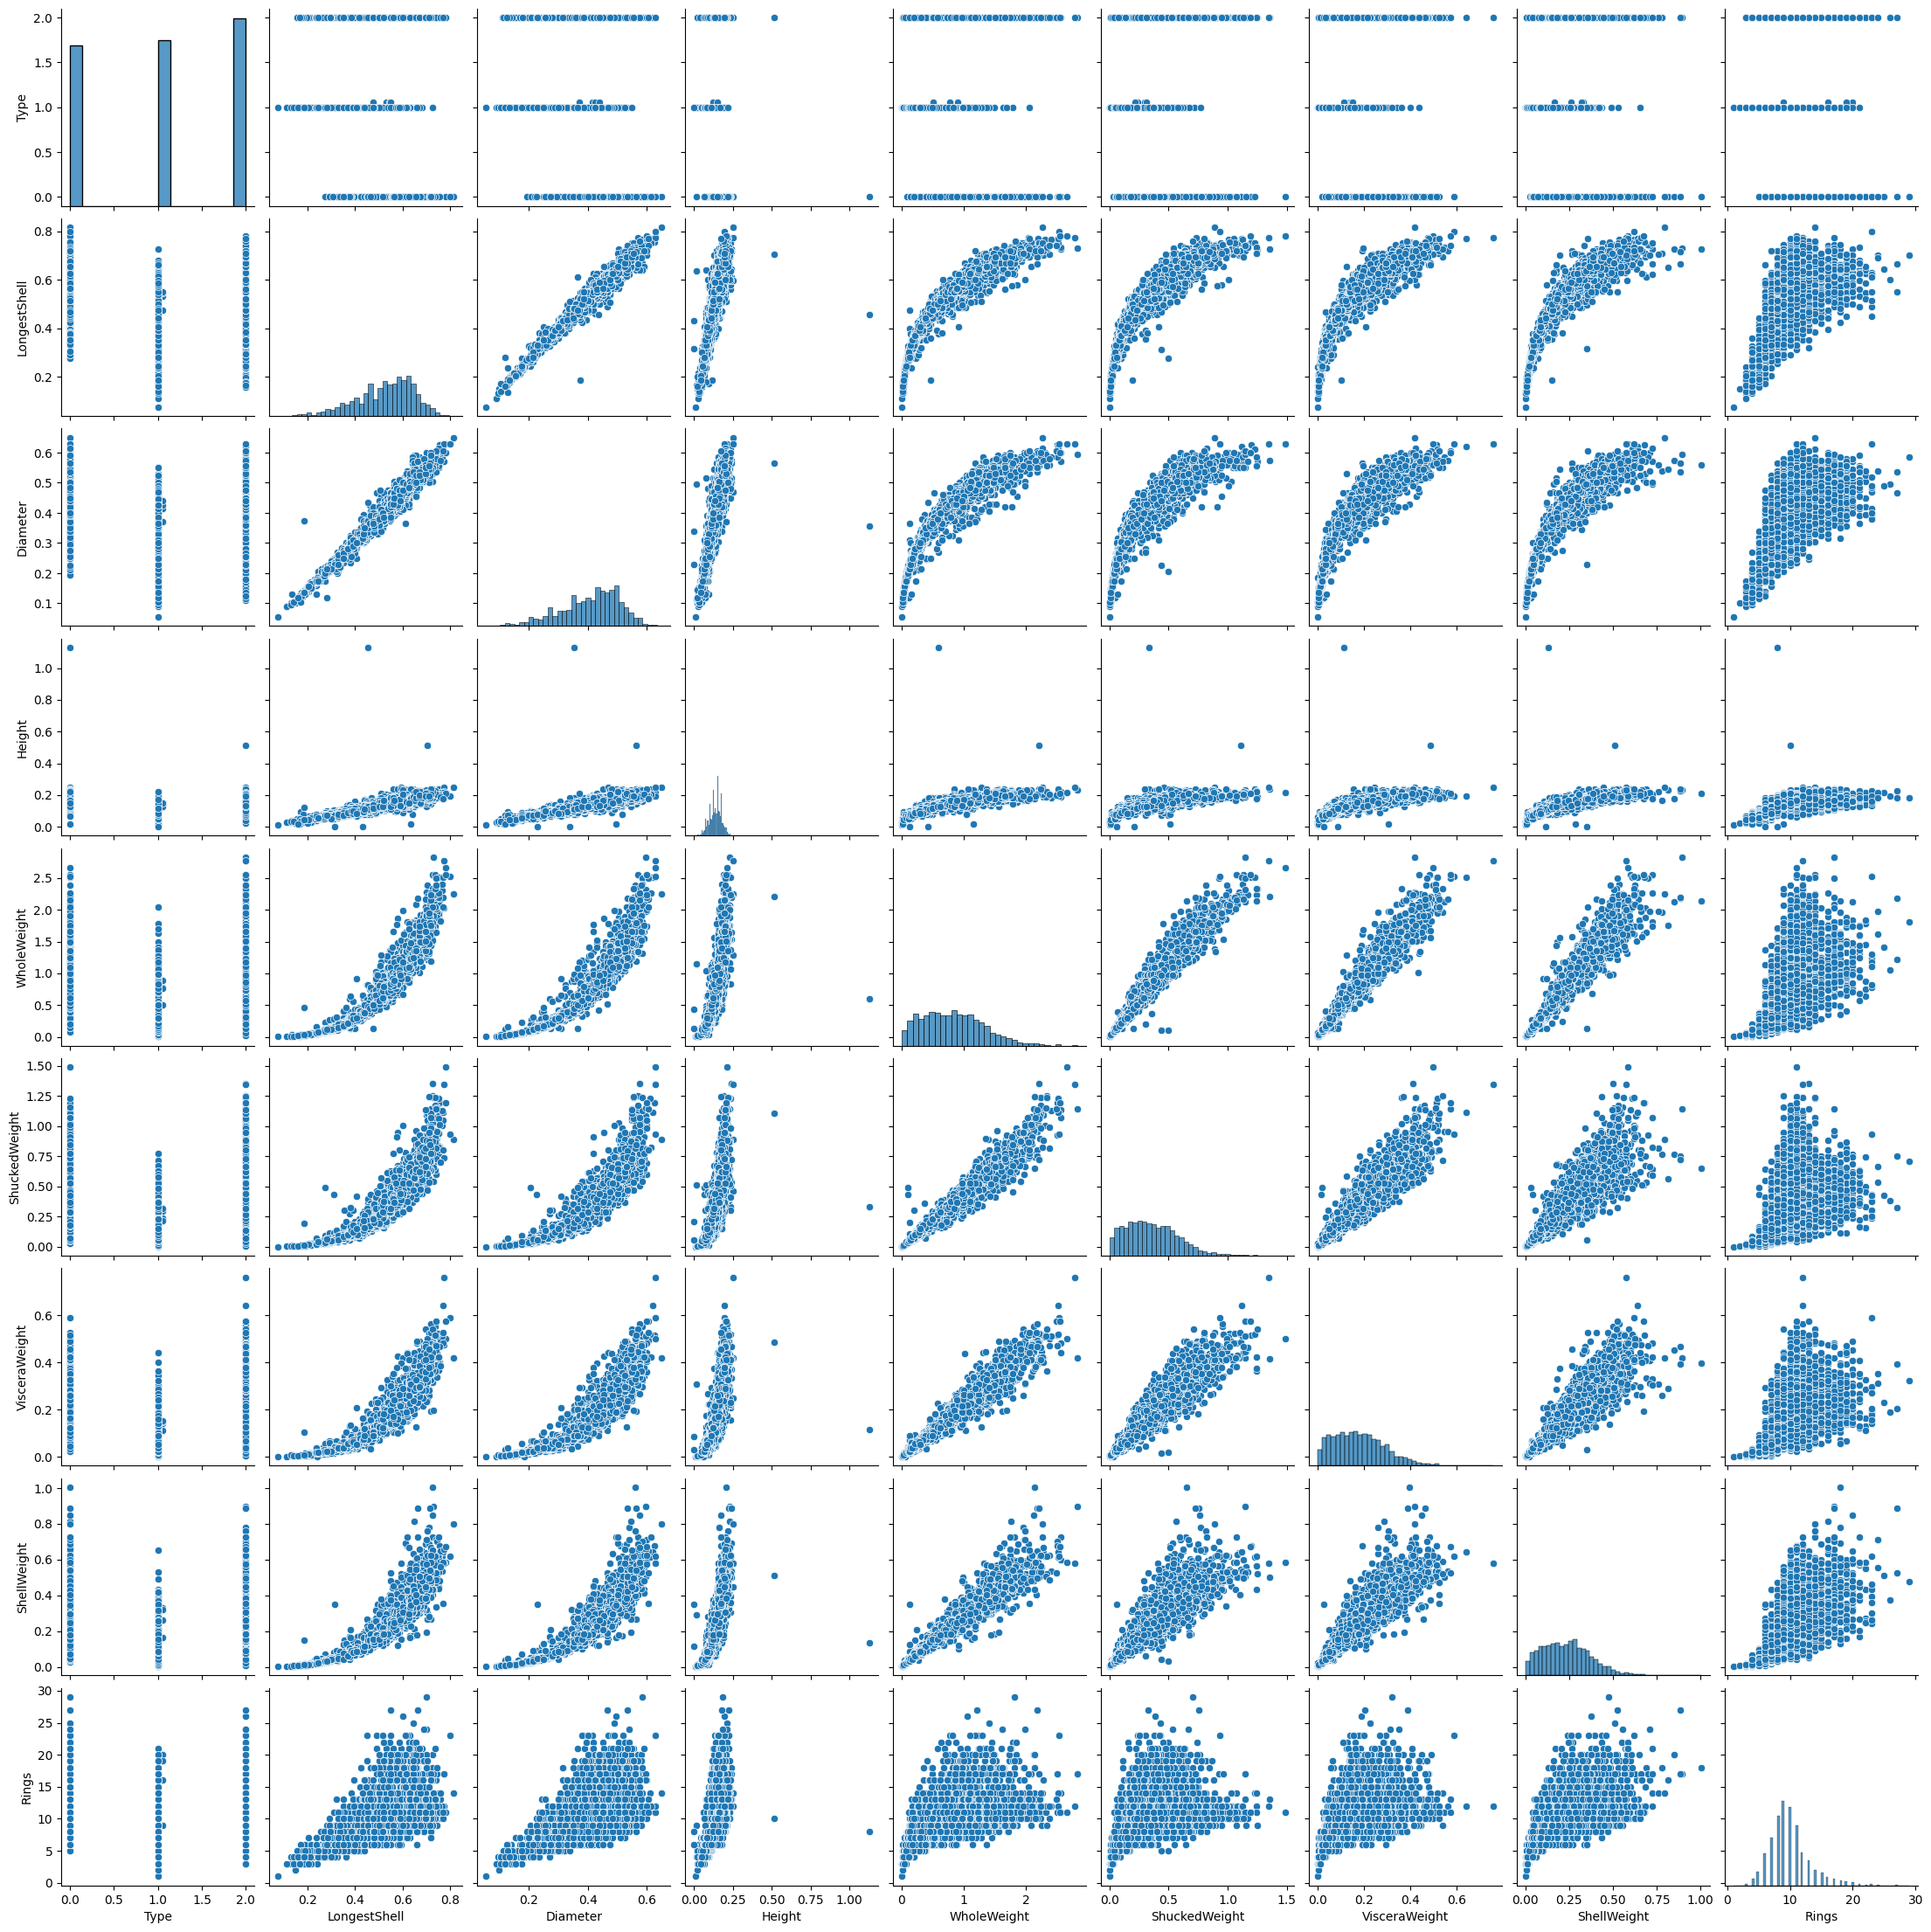

In [1600]:
sns.pairplot(df)

In [1601]:
scaler=MinMaxScaler()

x_train=scaler.fit_transform(x_train)
x_test=scaler.fit(x_test)

In [1602]:
x_train

array([[0.38028169, 0.13110846, 0.71046909],
       [0.22535211, 0.22884386, 0.96707052],
       [0.3943662 , 0.05244338, 0.16992855],
       ...,
       [0.4084507 , 0.0238379 , 0.23485555],
       [0.64788732, 0.08343266, 0.38148493],
       [0.64788732, 0.16448153, 0.73314694]])

In [1603]:
model=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)


In [1604]:
model.fit(x_train,y_train)


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
x_train

,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
82,0.520,0.425,0.165,0.9885,0.3960,0.2250,0.3200,16
1161,0.610,0.485,0.160,1.0145,0.5315,0.2120,0.2415,8
3132,0.685,0.530,0.170,1.5105,0.7385,0.3525,0.3725,10
3672,0.595,0.440,0.135,0.9640,0.5005,0.1715,0.2575,10
68,0.475,0.390,0.120,0.5305,0.2135,0.1155,0.1700,10
...,...,...,...,...,...,...,...,...
3335,0.425,0.325,0.135,0.3820,0.1465,0.0790,0.1400,12
1099,0.500,0.375,0.140,0.5495,0.2480,0.1120,0.1585,7
2514,0.470,0.370,0.110,0.5555,0.2500,0.1150,0.1630,8
3606,0.510,0.375,0.110,0.5805,0.2865,0.1180,0.1480,7


In [ ]:
Y.unique()

array([2, 0, 1, 3])

In [ ]:
model.coef_

array([[ 0.37835284,  1.21768103,  0.70894964,  1.64322647, -1.11630511,
         2.05778287, -0.10238065,  0.01379525],
       [ 2.54320983,  1.0638438 , -0.33458257, -2.33194635,  0.48954985,
        -2.09436545,  0.04893149, -0.21564378],
       [-1.82383998, -1.46429501, -0.09899303,  1.58961627,  1.20679616,
         0.29996583,  0.14545724,  0.01086775],
       [-1.0977227 , -0.81722981, -0.27537403, -0.90089639, -0.5800409 ,
        -0.26338325, -0.09200807,  0.19098078]])

In [ ]:
model.intercept_


array([-0.77808996,  3.38070942,  1.33014169, -3.93276116])

In [ ]:
model.classes_

array([0, 1, 2, 3])

In [ ]:
y_pred=model.predict(x_test)
mean_absolute_error(y_test,y_pred)


np.float64(0.6722488038277512)

In [ ]:
r2_score(y_test,y_pred)

-0.7953374773089827

In [ ]:
from sklearn.metrics import f1_score,classification_report,accuracy_score,confusion_matrix

In [ ]:
f1_score(y_test,y_pred,average='macro')

np.float64(0.5556833786722986)

In [ ]:
f1_score(y_test,y_pred,average='micro')

np.float64(0.5753588516746412)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.48      0.33      0.39       241
           1       0.71      0.81      0.76       287
           2       0.49      0.55      0.52       308

    accuracy                           0.58       836
   macro avg       0.56      0.56      0.56       836
weighted avg       0.56      0.58      0.56       836



In [ ]:
print(confusion_matrix(y_test,y_pred))

NameError: name 'confusion_matrix' is not defined